<img src='11.jpg'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.2 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for plotly-resampler>=0.8.3.1 from https://files.pythonhosted.org/packages/08/1d/87d4ed45c26226630bcb0a205ff006c00645cc68977e22c0f6f16a7f5d2b/plotly_resampler-0.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for pmdarima!=1.8.1,<3.0.0,>=1.8.0 from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━

In [3]:
from pycaret.regression import*

In [4]:
df=pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')

In [5]:
df

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [6]:
df.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [7]:
setup(data=df,target='yield')

,Description,Value
0,Session id,5825
1,Target,yield
2,Target type,Regression
3,Original data shape,"(15289, 18)"
4,Transformed data shape,"(15289, 18)"
5,Transformed train set shape,"(10702, 18)"
6,Transformed test set shape,"(4587, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [8]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,357.8059,329037.0563,573.2012,0.8173,0.1052,0.0639,0.7010
lightgbm,Light Gradient Boosting Machine,360.5625,331798.7964,575.5237,0.8159,0.1062,0.0646,0.4840
catboost,CatBoost Regressor,364.6832,335996.9709,579.1927,0.8135,0.1070,0.0655,4.0560
rf,Random Forest Regressor,369.5647,346744.6036,588.3309,0.8075,0.1076,0.0660,2.6050
ridge,Ridge Regression,376.9949,349828.9377,591.0679,0.8058,0.1090,0.0680,0.0220
et,Extra Trees Regressor,380.8259,354897.4463,595.2325,0.8031,0.1091,0.0680,1.6020
br,Bayesian Ridge,374.2334,355515.1823,595.4332,0.8025,0.1085,0.0672,0.0240
lasso,Lasso Regression,382.5134,356094.9105,596.3582,0.8023,0.1098,0.0690,0.1100
llar,Lasso Least Angle Regression,382.5372,356625.3183,596.7995,0.8020,0.1099,0.0690,0.0210
lr,Linear Regression,374.3896,358100.7417,597.3621,0.8010,0.1086,0.0673,0.4910


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
#AUTO ML İLE ÇÖZÜMDE EN YÜKSEK DOĞRULUK ORANI %81 OLARAK ÇIKTI
#DEEP LEARNİN İLE DE ÇÖZMEYE ÇALIŞALIM

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('train.csv')

In [5]:
data

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [6]:
x=data.drop('yield',axis=1)
y=data[['yield']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [10]:
data.shape

(15289, 18)

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [14]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
96/96 [==============================] - 2s 5ms/step - loss: 15818123.0000 - val_loss: 10638333.0000
Epoch 2/300
96/96 [==============================] - 0s 3ms/step - loss: 10158653.0000 - val_loss: 8372109.0000
Epoch 3/300
96/96 [==============================] - 0s 3ms/step - loss: 4730298.5000 - val_loss: 2189361.7500
Epoch 4/300
96/96 [==============================] - 0s 3ms/step - loss: 2212230.5000 - val_loss: 2104573.7500
Epoch 5/300
96/96 [==============================] - 0s 3ms/step - loss: 2115743.0000 - val_loss: 1981571.7500
Epoch 6/300
96/96 [==============================] - 0s 2ms/step - loss: 2032359.2500 - val_loss: 2002296.7500
Epoch 7/300
96/96 [==============================] - 0s 3ms/step - loss: 1935666.1250 - val_loss: 1843527.3750
Epoch 8/300
96/96 [==============================] - 0s 2ms/step - loss: 1851010.8750 - val_loss: 1741542.0000
Epoch 9/300
96/96 [==============================] - 0s 3ms/step - loss: 1756599.6250 - val_loss: 1731767.125

96/96 [==============================] - 0s 2ms/step - loss: 467261.9375 - val_loss: 443344.4375
Epoch 150/300
96/96 [==============================] - 0s 2ms/step - loss: 473470.3438 - val_loss: 486319.1875
Epoch 151/300
96/96 [==============================] - 0s 2ms/step - loss: 488804.3750 - val_loss: 440889.5000
Epoch 152/300
96/96 [==============================] - 0s 2ms/step - loss: 448130.1875 - val_loss: 444752.8125
Epoch 153/300
96/96 [==============================] - 0s 2ms/step - loss: 466374.2188 - val_loss: 475389.4375
Epoch 154/300
96/96 [==============================] - 0s 2ms/step - loss: 450223.6875 - val_loss: 441616.8750
Epoch 155/300
96/96 [==============================] - 0s 2ms/step - loss: 459006.3125 - val_loss: 459716.6562
Epoch 156/300
96/96 [==============================] - 0s 2ms/step - loss: 450485.2812 - val_loss: 463339.2500
Epoch 157/300
96/96 [==============================] - 0s 2ms/step - loss: 456612.3125 - val_loss: 448953.4375
Epoch 158/300
9

Epoch 223/300
96/96 [==============================] - 0s 2ms/step - loss: 459330.5938 - val_loss: 447272.3438
Epoch 224/300
96/96 [==============================] - 0s 2ms/step - loss: 468555.4375 - val_loss: 437089.6250
Epoch 225/300
96/96 [==============================] - 0s 2ms/step - loss: 459847.1562 - val_loss: 470195.2812
Epoch 226/300
96/96 [==============================] - 0s 2ms/step - loss: 462790.0938 - val_loss: 449768.9688
Epoch 227/300
96/96 [==============================] - 0s 2ms/step - loss: 456107.7812 - val_loss: 454426.1250
Epoch 228/300
96/96 [==============================] - 0s 2ms/step - loss: 446946.5625 - val_loss: 457067.7812
Epoch 229/300
96/96 [==============================] - 0s 2ms/step - loss: 450075.9062 - val_loss: 476631.0625
Epoch 230/300
96/96 [==============================] - 0s 2ms/step - loss: 453004.1250 - val_loss: 467881.7188
Epoch 231/300
96/96 [==============================] - 0s 2ms/step - loss: 447805.9375 - val_loss: 435982.4375
E

Epoch 297/300
96/96 [==============================] - 0s 2ms/step - loss: 439038.0938 - val_loss: 436626.1562
Epoch 298/300
96/96 [==============================] - 0s 2ms/step - loss: 443748.2500 - val_loss: 437077.1875
Epoch 299/300
96/96 [==============================] - 0s 2ms/step - loss: 463067.9375 - val_loss: 466887.3750
Epoch 300/300
96/96 [==============================] - 0s 2ms/step - loss: 453849.9375 - val_loss: 435205.6875


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                342       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1882 (7.35 KB)
Trainable params: 1882 (7.3

In [16]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

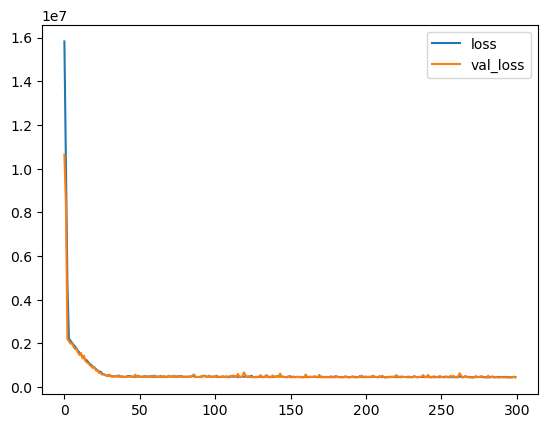

In [17]:
loss_df.plot()

In [18]:
tahmin=model.predict(x_test)

96/96 [==============================] - 0s 2ms/step


In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
r2_score(y_test,tahmin)

0.752433717072955

In [21]:
mean_squared_error(y_test,tahmin)**.5

659.7011568634249

In [22]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1300)

Epoch 1/1300
96/96 [==============================] - 0s 5ms/step - loss: 450731.2812 - val_loss: 469745.2812
Epoch 2/1300
96/96 [==============================] - 0s 3ms/step - loss: 445349.1562 - val_loss: 477592.4375
Epoch 3/1300
96/96 [==============================] - 0s 3ms/step - loss: 445030.2812 - val_loss: 465934.6875
Epoch 4/1300
96/96 [==============================] - 0s 3ms/step - loss: 437675.6875 - val_loss: 438600.9688
Epoch 5/1300
96/96 [==============================] - 0s 2ms/step - loss: 464905.5312 - val_loss: 681235.6875
Epoch 6/1300
96/96 [==============================] - 0s 2ms/step - loss: 465631.8750 - val_loss: 438947.2812
Epoch 7/1300
96/96 [==============================] - 0s 2ms/step - loss: 437226.3438 - val_loss: 457859.0625
Epoch 8/1300
96/96 [==============================] - 0s 2ms/step - loss: 444832.1875 - val_loss: 448314.8125
Epoch 9/1300
96/96 [==============================] - 0s 3ms/step - loss: 448684.2188 - val_loss: 485352.5938
Epoch 10/1

Epoch 75/1300
96/96 [==============================] - 0s 2ms/step - loss: 444091.4062 - val_loss: 437059.7188
Epoch 76/1300
96/96 [==============================] - 0s 2ms/step - loss: 438107.3125 - val_loss: 547478.6250
Epoch 77/1300
96/96 [==============================] - 0s 2ms/step - loss: 461418.4375 - val_loss: 490691.5625
Epoch 78/1300
96/96 [==============================] - 0s 2ms/step - loss: 452646.8750 - val_loss: 459078.1875
Epoch 79/1300
96/96 [==============================] - 0s 2ms/step - loss: 437299.0625 - val_loss: 443605.9688
Epoch 80/1300
96/96 [==============================] - 0s 2ms/step - loss: 463149.1875 - val_loss: 746121.5625
Epoch 81/1300
96/96 [==============================] - 0s 2ms/step - loss: 479725.0312 - val_loss: 444515.7500
Epoch 82/1300
96/96 [==============================] - 0s 2ms/step - loss: 443583.8125 - val_loss: 431196.9375
Epoch 83/1300
96/96 [==============================] - 0s 2ms/step - loss: 468978.7812 - val_loss: 438617.3125
E

96/96 [==============================] - 0s 2ms/step - loss: 440175.5312 - val_loss: 424923.4062
Epoch 222/1300
96/96 [==============================] - 0s 2ms/step - loss: 447658.0312 - val_loss: 500831.7812
Epoch 223/1300
96/96 [==============================] - 0s 2ms/step - loss: 437886.5000 - val_loss: 426675.3125
Epoch 224/1300
96/96 [==============================] - 0s 3ms/step - loss: 439005.5000 - val_loss: 468223.6250
Epoch 225/1300
96/96 [==============================] - 0s 3ms/step - loss: 436734.6875 - val_loss: 433149.2812
Epoch 226/1300
96/96 [==============================] - 0s 2ms/step - loss: 431406.9062 - val_loss: 425799.1250
Epoch 227/1300
96/96 [==============================] - 0s 2ms/step - loss: 441409.3438 - val_loss: 425601.1875
Epoch 228/1300
96/96 [==============================] - 0s 2ms/step - loss: 431892.4062 - val_loss: 436300.9375
Epoch 229/1300
96/96 [==============================] - 0s 3ms/step - loss: 441770.2188 - val_loss: 431633.9062
Epoch 2

96/96 [==============================] - 0s 3ms/step - loss: 435574.1875 - val_loss: 441518.5000
Epoch 368/1300
96/96 [==============================] - 0s 2ms/step - loss: 435791.8750 - val_loss: 441899.1562
Epoch 369/1300
96/96 [==============================] - 0s 2ms/step - loss: 436544.5312 - val_loss: 423089.7188
Epoch 370/1300
96/96 [==============================] - 0s 2ms/step - loss: 431957.1250 - val_loss: 429783.1562
Epoch 371/1300
96/96 [==============================] - 0s 2ms/step - loss: 444725.1875 - val_loss: 438529.9688
Epoch 372/1300
96/96 [==============================] - 0s 3ms/step - loss: 437895.6250 - val_loss: 423854.2188
Epoch 373/1300
96/96 [==============================] - 0s 3ms/step - loss: 427685.9688 - val_loss: 438884.3438
Epoch 374/1300
96/96 [==============================] - 0s 2ms/step - loss: 430789.9062 - val_loss: 425311.4062
Epoch 375/1300
96/96 [==============================] - 0s 2ms/step - loss: 431163.7812 - val_loss: 420842.2188
Epoch 3

96/96 [==============================] - 0s 2ms/step - loss: 427350.4688 - val_loss: 440857.7500
Epoch 514/1300
96/96 [==============================] - 0s 2ms/step - loss: 429166.0000 - val_loss: 422581.9688
Epoch 515/1300
96/96 [==============================] - 0s 3ms/step - loss: 440205.5000 - val_loss: 451571.5312
Epoch 516/1300
96/96 [==============================] - 0s 3ms/step - loss: 440479.2500 - val_loss: 430155.5938
Epoch 517/1300
96/96 [==============================] - 0s 2ms/step - loss: 435228.9375 - val_loss: 418468.0000
Epoch 518/1300
96/96 [==============================] - 0s 2ms/step - loss: 428114.5938 - val_loss: 424946.8438
Epoch 519/1300
96/96 [==============================] - 0s 2ms/step - loss: 437206.2500 - val_loss: 446894.2188
Epoch 520/1300
96/96 [==============================] - 0s 2ms/step - loss: 446246.1562 - val_loss: 460646.1250
Epoch 521/1300
96/96 [==============================] - 0s 2ms/step - loss: 436223.3750 - val_loss: 444828.6250
Epoch 5

96/96 [==============================] - 0s 2ms/step - loss: 429287.9375 - val_loss: 464777.8438
Epoch 660/1300
96/96 [==============================] - 0s 2ms/step - loss: 427116.7500 - val_loss: 416573.3125
Epoch 661/1300
96/96 [==============================] - 0s 2ms/step - loss: 419990.1875 - val_loss: 420868.2188
Epoch 662/1300
96/96 [==============================] - 0s 2ms/step - loss: 421225.5938 - val_loss: 439691.4688
Epoch 663/1300
96/96 [==============================] - 0s 2ms/step - loss: 427773.0625 - val_loss: 468781.7188
Epoch 664/1300
96/96 [==============================] - 0s 2ms/step - loss: 433756.5625 - val_loss: 416081.0312
Epoch 665/1300
96/96 [==============================] - 0s 2ms/step - loss: 426203.9375 - val_loss: 428040.3750
Epoch 666/1300
96/96 [==============================] - 0s 2ms/step - loss: 427425.5312 - val_loss: 472948.8750
Epoch 667/1300
96/96 [==============================] - 0s 2ms/step - loss: 426561.4375 - val_loss: 452081.1250
Epoch 6

96/96 [==============================] - 0s 2ms/step - loss: 427697.4062 - val_loss: 416699.1562
Epoch 806/1300
96/96 [==============================] - 0s 2ms/step - loss: 428612.6875 - val_loss: 416380.6562
Epoch 807/1300
96/96 [==============================] - 0s 2ms/step - loss: 415224.5625 - val_loss: 419666.5000
Epoch 808/1300
96/96 [==============================] - 0s 2ms/step - loss: 426107.2500 - val_loss: 421188.4375
Epoch 809/1300
96/96 [==============================] - 0s 2ms/step - loss: 422333.7812 - val_loss: 430892.5312
Epoch 810/1300
96/96 [==============================] - 0s 2ms/step - loss: 419715.3750 - val_loss: 413108.6562
Epoch 811/1300
96/96 [==============================] - 0s 2ms/step - loss: 423462.8750 - val_loss: 412332.0625
Epoch 812/1300
96/96 [==============================] - 0s 2ms/step - loss: 418742.9062 - val_loss: 413177.6250
Epoch 813/1300
96/96 [==============================] - 0s 2ms/step - loss: 416949.2188 - val_loss: 410410.6562
Epoch 8

96/96 [==============================] - 0s 2ms/step - loss: 431823.0000 - val_loss: 426120.6250
Epoch 952/1300
96/96 [==============================] - 0s 2ms/step - loss: 425678.8750 - val_loss: 424545.0625
Epoch 953/1300
96/96 [==============================] - 0s 2ms/step - loss: 416890.1875 - val_loss: 423305.7188
Epoch 954/1300
96/96 [==============================] - 0s 2ms/step - loss: 416618.7812 - val_loss: 412418.8750
Epoch 955/1300
96/96 [==============================] - 0s 2ms/step - loss: 413580.4688 - val_loss: 410256.9375
Epoch 956/1300
96/96 [==============================] - 0s 2ms/step - loss: 409089.4688 - val_loss: 414068.1875
Epoch 957/1300
96/96 [==============================] - 0s 2ms/step - loss: 422555.0000 - val_loss: 429277.1875
Epoch 958/1300
96/96 [==============================] - 0s 2ms/step - loss: 429282.0938 - val_loss: 414215.7500
Epoch 959/1300
96/96 [==============================] - 0s 2ms/step - loss: 412358.3438 - val_loss: 425312.8438
Epoch 9

96/96 [==============================] - 0s 2ms/step - loss: 415332.8438 - val_loss: 406743.6875
Epoch 1025/1300
96/96 [==============================] - 0s 2ms/step - loss: 410810.9062 - val_loss: 411296.5625
Epoch 1026/1300
96/96 [==============================] - 0s 2ms/step - loss: 424327.4375 - val_loss: 411258.5625
Epoch 1027/1300
96/96 [==============================] - 0s 2ms/step - loss: 414152.2500 - val_loss: 412036.9062
Epoch 1028/1300
96/96 [==============================] - 0s 2ms/step - loss: 409645.7500 - val_loss: 412237.0938
Epoch 1029/1300
96/96 [==============================] - 0s 2ms/step - loss: 411128.7500 - val_loss: 415559.0625
Epoch 1030/1300
96/96 [==============================] - 0s 2ms/step - loss: 415785.0625 - val_loss: 426718.1250
Epoch 1031/1300
96/96 [==============================] - 0s 2ms/step - loss: 422655.5625 - val_loss: 424266.3750
Epoch 1032/1300
96/96 [==============================] - 0s 3ms/step - loss: 417827.3750 - val_loss: 425687.2812

96/96 [==============================] - 0s 3ms/step - loss: 411000.0000 - val_loss: 413024.4688
Epoch 1169/1300
96/96 [==============================] - 0s 3ms/step - loss: 420911.7500 - val_loss: 422787.5938
Epoch 1170/1300
96/96 [==============================] - 0s 2ms/step - loss: 410160.3438 - val_loss: 406157.8438
Epoch 1171/1300
96/96 [==============================] - 0s 3ms/step - loss: 416843.9688 - val_loss: 407010.4375
Epoch 1172/1300
96/96 [==============================] - 0s 3ms/step - loss: 409994.5312 - val_loss: 418735.7500
Epoch 1173/1300
96/96 [==============================] - 0s 2ms/step - loss: 419918.4375 - val_loss: 405186.8438
Epoch 1174/1300
96/96 [==============================] - 0s 3ms/step - loss: 411609.6875 - val_loss: 494363.6562
Epoch 1175/1300
96/96 [==============================] - 0s 3ms/step - loss: 411033.8125 - val_loss: 405798.4375
Epoch 1176/1300
96/96 [==============================] - 0s 2ms/step - loss: 422886.5000 - val_loss: 441600.1562

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                342       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1882 (7.35 KB)
Trainable params: 1882 (7.3

In [24]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

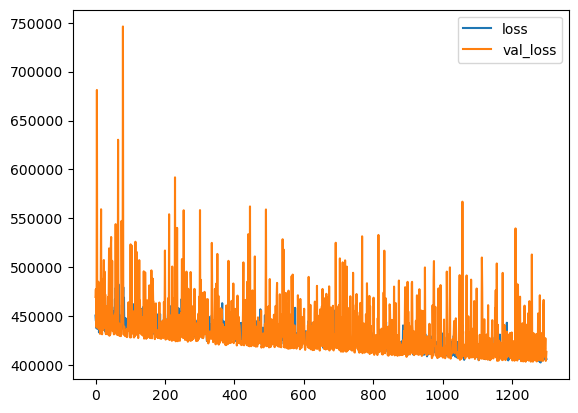

In [25]:
loss_df.plot()

In [26]:
tahmin=model.predict(x_test)

96/96 [==============================] - 0s 2ms/step


In [27]:
r2_score(y_test,tahmin)

0.7647248568194907